# Sudoku Solver

## Graph Coloring Algorithm

Steps:
* Create node class containing dict of connections
* Create graph class containing all the nodes and their connections (edges)
* Create Sudoku Graph (Connections) 9x9 rows and cols, containing ids of all nodes and info on what nodes to connect
* Create Sudoku Solver Class where we implement recursion

In [1]:
class Node:
    
    def __init__(self,idx, data = 0):
        """
        idx : Integer
        """
        self.id = idx
        self.data = data # optional
        self.linkedTo = dict()
        
    def add_neighbour(self, n, w=0):
        """
        n = neighbour Node
        w = weight = 0
        
        adds the neighbour_id : weight pair to the dict
        """
        if n.id not in self.linkedTo.keys():
            self.linkedTo[n.id] = w
        
    def get_connections(self):
        return self.linkedTo.keys()
    
    def get_id(self):
        return self.id
    
    def __str__(self):
        return str(self.data) + " Connected to : " + str([x.data for x in self.linkedTo])

In [2]:
class Graph:
    
    total_vertices = 0
    
    def __init__(self):
        self.all_nodes = dict()
        
    def add_node(self, idx):
        if idx in self.all_nodes:
            return None
        node = Node(idx=idx)
        self.all_nodes[idx] = node #replace if idx existing
        Graph.total_vertices += 1 #increment vertices no.
        return node
            
    def add_edge(self, src, dst):
        """
        Method to add an edge from one node to another
        src= source
        dst = where the edge go to
        """
        node_dst = self.all_nodes[dst]
        node_src = self.all_nodes[src]
        
        self.all_nodes[src].add_neighbour(node_dst)
        self.all_nodes[dst].add_neighbour(node_src)
        
    def is_neighbour(self, n1, n2):
        """
        Check if 2 nodes are adjacenents
        """
        if n1>=1 and n1<= 81 and n2>=1 and n2<=81 and n1!=n2: # for sudoku check if node is under id 81 (in 9x9)
            if n2 in self.all_nodes[n1].get_connections(): #check all connections in the graph
                return True
            
        return False
    
    def print_edges(self):
        for idx in self.all_nodes:
            node = self.all_nodes[idx]
            for connection in node.get_connections():
                print(node.get_id(), " =====> ", self.all_nodes[connection].get_id())
    
    def get_all_node_ids(self):
        return self.all_nodes.keys()

<br>

## Sudoku Connections

IDs for each vertice

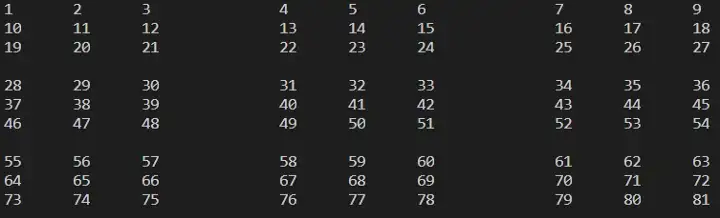

In [3]:
class Sudoku:
    def __init__(self):
        self.graph = Graph()
        self.rows = 9
        self.cols = 9
        self.total_blocks = self.rows * self.cols
        
        self.__generate_graph()
        self.connect_edges()
        self.all_ids = self.graph.get_all_node_ids()
        
    def __generate_graph(self):
        """
        Generates nodes with id from 1 to 81
        """
        for i in range(1, self.total_blocks+1):
            _ = self.graph.add_node(i)
            
    def connect_edges(self):
        """
        Connect edges
        """
        matrix = self.__get_matrix() #matrix is the 9x9 containing IDs
        head_connections = dict()
        
        for row in range(9):
            for col in range(9):
                head = matrix[row][col]
                connections=self.__what_to_connect(matrix,row,col)
                head_connections[head]=connections
                
        self.connect(head_connections=head_connections)
        
        
    def connect(self, head_connections):
        for head in head_connections.keys():
            connections = head_connections[head]
            for key in connections:
                for node in connections[key]:
                    self.graph.add_edge(src=head, dst=node)
                    
    def __what_to_connect(self, matrix, rows, cols):
        connections = dict() #store all connections, rows, cols and blocks
        row = []
        col = []
        block = []
        
        for c in range(cols+1, 9): #connect rows
            row.append(matrix[rows][c])
        connections["rows"] = row
        
        for r in range(rows+1, 9): #connect colss
            row.append(matrix[r][cols])
        connections["cols"] = col
        
        #block (3x3)
        # useful method to know what to connect
        # connect each node in a block. Each node has a particular id e.g
        # 1  2  3     4    5    6
        # 10 11 12    13   14   15
        # 19 20 21    16   17    18
        # then
        if rows%3 == 0 : 

            if cols%3 == 0 : # for example. For row 3, col 3, we have id =31
                
                block.append(matrix[rows+1][cols+1])  #append row 5, col 5 (id=41)
                block.append(matrix[rows+1][cols+2])  #append row 5, col 6 (id=42)
                block.append(matrix[rows+2][cols+1])  #append row 6, col 5 (id=50) 
                block.append(matrix[rows+2][cols+2])  #append row 6, col 6 (id=51)
                #nodes in the same row are already included in connections['rows']

            elif cols%3 == 1 :
                
                block.append(matrix[rows+1][cols-1])
                block.append(matrix[rows+1][cols+1])
                block.append(matrix[rows+2][cols-1])
                block.append(matrix[rows+2][cols+1])
                
            elif cols%3 == 2 :
                
                block.append(matrix[rows+1][cols-2])
                block.append(matrix[rows+1][cols-1])
                block.append(matrix[rows+2][cols-2])
                block.append(matrix[rows+2][cols-1])

        elif rows%3 == 1 :
            
            if cols%3 == 0 :
                
                block.append(matrix[rows-1][cols+1])
                block.append(matrix[rows-1][cols+2])
                block.append(matrix[rows+1][cols+1])
                block.append(matrix[rows+1][cols+2])

            elif cols%3 == 1 :
                
                block.append(matrix[rows-1][cols-1])
                block.append(matrix[rows-1][cols+1])
                block.append(matrix[rows+1][cols-1])
                block.append(matrix[rows+1][cols+1])
                
            elif cols%3 == 2 :
                
                block.append(matrix[rows-1][cols-2])
                block.append(matrix[rows-1][cols-1])
                block.append(matrix[rows+1][cols-2])
                block.append(matrix[rows+1][cols-1])

        elif rows%3 == 2 :
            
            if cols%3 == 0 :
                
                block.append(matrix[rows-2][cols+1])
                block.append(matrix[rows-2][cols+2])
                block.append(matrix[rows-1][cols+1])
                block.append(matrix[rows-1][cols+2])

            elif cols%3 == 1 :
                
                block.append(matrix[rows-2][cols-1])
                block.append(matrix[rows-2][cols+1])
                block.append(matrix[rows-1][cols-1])
                block.append(matrix[rows-1][cols+1])
                
            elif cols%3 == 2 :
                
                block.append(matrix[rows-2][cols-2])
                block.append(matrix[rows-2][cols-1])
                block.append(matrix[rows-1][cols-2])
                block.append(matrix[rows-1][cols-1])
        
        connections["blocks"] = block
        return connections
        
        
    def __get_matrix(self) : 
        """
        Generate 9x9 matrix
        """
        # generate
        matrix = [[0 for cols in range(self.cols)] for rows in range(self.rows)]

        # fill
        count = 1
        for rows in range(9) :
            for cols in range(9):
                matrix[rows][cols] = count
                count+=1
        return matrix

In [4]:
"""
TESTING
"""       
def test_connections() : 
    sudoku = Sudoku()
    sudoku.connect_edges()
    print("All node Ids : ")
    print(sudoku.graph.get_all_node_ids())
    print()
    for idx in sudoku.graph.get_all_node_ids() : 
        print(idx, "===>", sudoku.graph.all_nodes[idx].get_connections())

test_connections()

All node Ids : 
dict_keys([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81])

1 ===> dict_keys([2, 3, 4, 5, 6, 7, 8, 9, 10, 19, 28, 37, 46, 55, 64, 73, 11, 12, 20, 21])
2 ===> dict_keys([1, 3, 4, 5, 6, 7, 8, 9, 11, 20, 29, 38, 47, 56, 65, 74, 10, 12, 19, 21])
3 ===> dict_keys([1, 2, 4, 5, 6, 7, 8, 9, 12, 21, 30, 39, 48, 57, 66, 75, 10, 11, 19, 20])
4 ===> dict_keys([1, 2, 3, 5, 6, 7, 8, 9, 13, 22, 31, 40, 49, 58, 67, 76, 14, 15, 23, 24])
5 ===> dict_keys([1, 2, 3, 4, 6, 7, 8, 9, 14, 23, 32, 41, 50, 59, 68, 77, 13, 15, 22, 24])
6 ===> dict_keys([1, 2, 3, 4, 5, 7, 8, 9, 15, 24, 33, 42, 51, 60, 69, 78, 13, 14, 22, 23])
7 ===> dict_keys([1, 2, 3, 4, 5, 6, 8, 9, 16, 25, 34, 43, 52, 61, 70, 79, 17, 18, 26, 27])
8 ===> dict_keys([1

In [9]:
import timeit
default_board = [[3, 9, 0,   0, 5, 0,   0, 0, 0],
                [0, 0, 0,   2, 0, 0,   0, 0, 5],
                [0, 0, 0,   7, 1, 9,   0, 8, 0],
                [0, 5, 0,   0, 6, 8,   0, 0, 0],
                [2, 0, 6,   0, 0, 3,   0, 0, 0],
                [0, 0, 0,   0, 0, 0,   0, 0, 4],
                [5, 0, 0,   0, 0, 0,   0, 0, 0],
                [6, 7, 0,   1, 0, 5,   0, 4, 0],
                [1, 0, 9,   0, 0, 0,   2, 0, 0]]

class SudokuBoard:
    def __init__(self, board=default_board):
        self.board = self.get_board()
        self.sudoku_connections = Sudoku()
        self.mapped_grid = self.__get_mapped_matrix()
        self.board = board
        
    def __get_mapped_matrix(self):
        matrix = [[0 for cols in range(9)] for rows in range(9)]

        count = 1
        for rows in range(9) : 
            for cols in range(9):
                matrix[rows][cols] = count
                count+=1
        return matrix

    def get_board(self, board=default_board):
        return board
    
    def print_board(self):
        print("    1 2 3     4 5 6     7 8 9")
        for i in range(len(self.board)) : 
            if i%3 == 0:
                print("  - - - - - - - - - - - - - - ")

            for j in range(len(self.board[i])) : 
                if j %3 == 0 :#and j != 0 : 
                    print(" |  ", end = "")
                if j == 8 :
                    print(self.board[i][j]," | ", i+1)
                else : 
                    print(f"{ self.board[i][j] } ", end="")
        print("  - - - - - - - - - - - - - - ")
        

    def color_graph(self):
        color = [0] * (self.sudoku_connections.graph.total_vertices+1) #total 81 vertices and unique ids for sudoku
        fixed_color = [] #array of ids where the color is already fixed and shouldn't change
        for row in range(len(self.board)) : 
            for col in range(len(self.board[row])) : 
                if self.board[row][col] != 0 : 
                    idx = self.mapped_grid[row][col]
                    color[idx] = self.board[row][col] #color it!
                    fixed_color.append(idx)
        return color, fixed_color

    def solve(self, m =9) : 
        color, fixed_color = self.color_graph()
        if self.recursion(m =m, color=color, node =1, fixed_color=fixed_color) is None :
            print(":(")
            return False
        count = 1
        for row in range(9) : 
            for col in range(9) :
                self.board[row][col] = color[count]
                count += 1
        return color
    
    def recursion(self, m, color, node, fixed_color) :
        if node == self.sudoku_connections.graph.total_vertices +1 : #if idx = 81 return
            return True
        for c in range(1, m+1) : 
            if self.can_color(node, color, c, fixed_color) == True :
                color[node] = c
                if self.recursion(m, color, node+1, fixed_color) : 
                    return True # end puzzle
            if node not in fixed_color : 
                color[node] = 0


    def can_color(self, nodeidx, color, c, fixed_color) : 
        """
        Algorithm to check if a color is safe to be put in the box. Return True if yes. Else try next color
        
        """
        if nodeidx in fixed_color and color[nodeidx] == c:  #check if the node id is in placed color array and if color already assigned
            return True
        elif nodeidx in fixed_color : # if color is already assigned in that node return false
            return False

        for i in range(1, self.sudoku_connections.graph.total_vertices+1) :
            #loop through neighbors of current node and see if current color c is already assigned to any of them
            if color[i] == c and self.sudoku_connections.graph.is_neighbour(nodeidx, i) :
                return False
        return True


def test() : 
    s = SudokuBoard(board=default_board)
    print("\n\n")
    s.print_board()
    starttime = timeit.timeit()
    print("The start time is :",starttime)
    s.solve(m=9)
    print("Time taken :", (timeit.timeit() - starttime))
    s.print_board()

test()




    1 2 3     4 5 6     7 8 9
  - - - - - - - - - - - - - - 
 |  3 9 0  |  0 5 0  |  0 0 0  |  1
 |  0 0 0  |  2 0 0  |  0 0 5  |  2
 |  0 0 0  |  7 1 9  |  0 8 0  |  3
  - - - - - - - - - - - - - - 
 |  0 5 0  |  0 6 8  |  0 0 0  |  4
 |  2 0 6  |  0 0 3  |  0 0 0  |  5
 |  0 0 0  |  0 0 0  |  0 0 4  |  6
  - - - - - - - - - - - - - - 
 |  5 0 0  |  0 0 0  |  0 0 0  |  7
 |  6 7 0  |  1 0 5  |  0 4 0  |  8
 |  1 0 9  |  0 0 0  |  2 0 0  |  9
  - - - - - - - - - - - - - - 
The start time is : 0.012032500000003665
Time taken : -0.003028200000002812
    1 2 3     4 5 6     7 8 9
  - - - - - - - - - - - - - - 
 |  3 9 1  |  8 5 6  |  4 2 7  |  1
 |  8 6 7  |  2 3 4  |  9 1 5  |  2
 |  4 2 5  |  7 1 9  |  6 8 3  |  3
  - - - - - - - - - - - - - - 
 |  7 5 4  |  9 6 8  |  1 3 2  |  4
 |  2 1 6  |  4 7 3  |  5 9 8  |  5
 |  9 3 8  |  5 2 1  |  7 6 4  |  6
  - - - - - - - - - - - - - - 
 |  5 4 3  |  6 9 2  |  8 7 1  |  7
 |  6 7 2  |  1 8 5  |  3 4 9  |  8
 |  1 8 9  |  3 4 7  |  2 5 6  |

In [6]:
times = []
import numpy as np
for i in range(1, 11):
    input_file = open(f'./puzzles/instance{i}.txt',"r")
    
    board = []
    for line in input_file:
        cells = ""
        cells = list(cells + ((line.replace("\n","").replace(".","0"))))
        cells_int = [eval(i) for i in cells]
        board.append(cells_int)
        
        
        
    s = SudokuBoard(board=np.array(board))
    print("\n\n")
    print(f"==> PUZZLE {i}", end="\n"*2)
    s.print_board()
    start = timeit.timeit()
    print("The start time is :",start)
    s.solve(m=9)
    end = timeit.timeit()
    print("End time: ", end)
    timetaken = (end- start)
    print("Time taken :", timetaken)
    times.append(timetaken)
    s.print_board()
    print("\n"*2, end="="*40)




==> PUZZLE 1

    1 2 3     4 5 6     7 8 9
  - - - - - - - - - - - - - - 
 |  5 3 0  |  0 7 0  |  0 0 0  |  1
 |  6 0 0  |  1 9 5  |  0 0 0  |  2
 |  0 9 8  |  0 0 0  |  0 6 0  |  3
  - - - - - - - - - - - - - - 
 |  8 0 0  |  0 6 0  |  0 0 3  |  4
 |  4 0 0  |  8 0 3  |  0 0 1  |  5
 |  7 0 0  |  0 2 0  |  0 0 6  |  6
  - - - - - - - - - - - - - - 
 |  0 6 0  |  0 0 0  |  2 8 0  |  7
 |  0 0 0  |  4 1 9  |  0 0 5  |  8
 |  0 0 0  |  0 8 0  |  0 7 9  |  9
  - - - - - - - - - - - - - - 
The start time is : 0.011732999999999993
End time:  0.009238499999999927
Time taken : -0.002494500000000066
    1 2 3     4 5 6     7 8 9
  - - - - - - - - - - - - - - 
 |  5 3 4  |  6 7 8  |  9 1 2  |  1
 |  6 7 2  |  1 9 5  |  3 4 8  |  2
 |  1 9 8  |  3 4 2  |  5 6 7  |  3
  - - - - - - - - - - - - - - 
 |  8 5 9  |  7 6 1  |  4 2 3  |  4
 |  4 2 6  |  8 5 3  |  7 9 1  |  5
 |  7 1 3  |  9 2 4  |  8 5 6  |  6
  - - - - - - - - - - - - - - 
 |  9 6 1  |  5 3 7  |  2 8 4  |  7
 |  2 8 7  |  4 1 9  |

End time:  0.00877630000000007
Time taken : 7.230000000024717e-05
    1 2 3     4 5 6     7 8 9
  - - - - - - - - - - - - - - 
 |  4 6 2  |  8 3 1  |  9 5 7  |  1
 |  7 9 5  |  4 2 6  |  1 8 3  |  2
 |  3 8 1  |  7 9 5  |  4 2 6  |  3
  - - - - - - - - - - - - - - 
 |  1 7 3  |  9 8 4  |  2 6 5  |  4
 |  6 5 9  |  3 1 2  |  7 4 8  |  5
 |  2 4 8  |  5 6 7  |  3 1 9  |  6
  - - - - - - - - - - - - - - 
 |  9 2 6  |  1 7 8  |  5 3 4  |  7
 |  8 3 4  |  2 5 9  |  6 7 1  |  8
 |  5 1 7  |  6 4 3  |  8 9 2  |  9
  - - - - - - - - - - - - - - 




==> PUZZLE 9

    1 2 3     4 5 6     7 8 9
  - - - - - - - - - - - - - - 
 |  0 3 0  |  0 5 0  |  0 4 0  |  1
 |  0 0 8  |  0 1 0  |  5 0 0  |  2
 |  4 6 0  |  0 0 0  |  0 1 2  |  3
  - - - - - - - - - - - - - - 
 |  0 7 0  |  5 0 2  |  0 8 0  |  4
 |  0 0 0  |  6 0 3  |  0 0 0  |  5
 |  0 4 0  |  1 0 9  |  0 3 0  |  6
  - - - - - - - - - - - - - - 
 |  2 5 0  |  0 0 0  |  0 9 8  |  7
 |  0 0 1  |  0 2 0  |  6 0 0  |  8
 |  0 8 0  |  0 6 0  |  0 2

In [7]:
import statistics

print("Max time", max(times), "seconds")
print("Min time", min(times), "seconds")
print("Mean", statistics.mean(times), "seconds")

Max time 0.0029514000000006035 seconds
Min time -0.005745700000000298 seconds
Mean -0.0007350400000000423 seconds


## References

Acknowledgements to:
* Ishaan Gupta https://medium.com/code-science/sudoku-solver-graph-coloring-8f1b4df47072
* https://networkx.org/nx-guides/content/generators/sudoku.html